In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

# Hypothesis Testing

## t-test
### t-distribution
A t-test is used when the test statistic follows a normal distribution with a unknown standard deviation $\sigma$. This commonly arises when a sample of $n$ observations is taken from a population with a unknown standard deviation. In this case, the standard deviation is replaced by the sample standard deviation *s* which an estimate based on the sample and the test statistics will follow a Student's *t* distribution. The *t*-distribution is dependent on the sample size $n$, which has $\nu = n-1$ degrees of freedom. A *t*-distribution with low degree of freedom $\nu$ will have fatter tails compared with a normal distribution, reflecting the larger unreliability estimate of $\sigma$ for small sample sizes. The *t*-distribution approaches normal distribution as $\nu$ becomes large as shown in the plots below: 


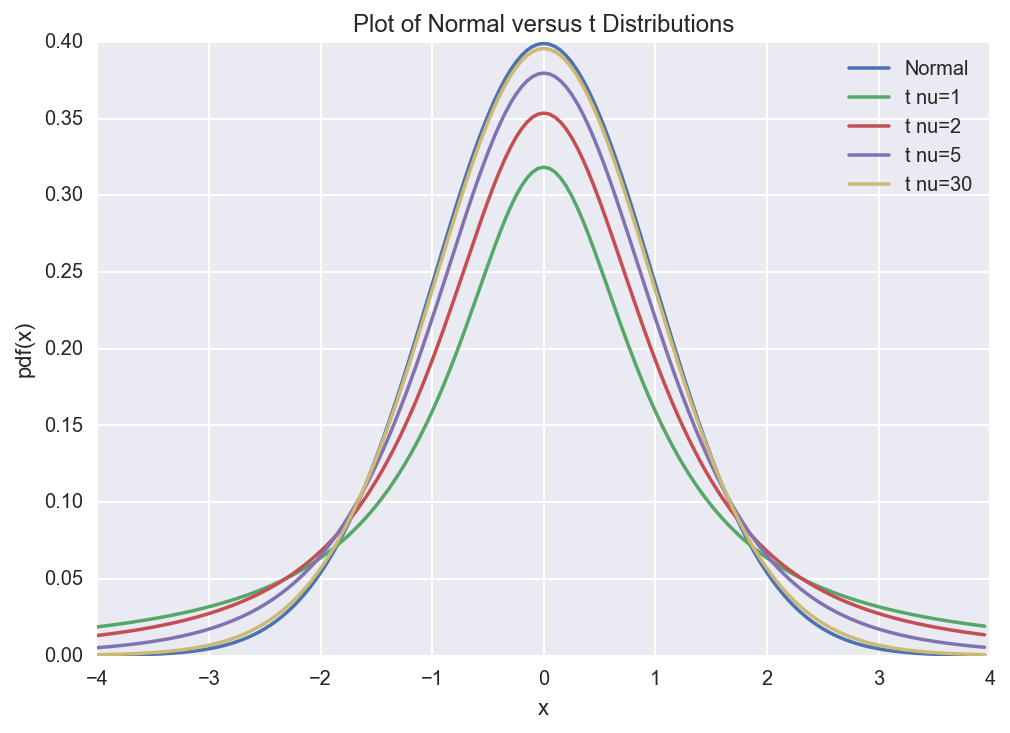

In [2]:
# Comparison between the normal and student t distributions

import numpy as np
import matplotlib.pylab as plt
from scipy import stats

x = np.arange(-4,4,.05)
plt.plot(x, stats.norm.pdf(x), label="Normal")
plt.plot(x, stats.t.pdf(x, 1), label="t nu=1")
plt.plot(x, stats.t.pdf(x, 2), label="t nu=2")
plt.plot(x, stats.t.pdf(x, 5), label="t nu=5")
plt.plot(x, stats.t.pdf(x, 30), label="t nu=30")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.title("Plot of Normal versus t Distributions")
plt.legend()
plt.show()

### t-value and p-value

One sample t-test will be presented to introduce t-value and p-values. Suppose that we have six quarters and want to find if the weight of this sample of quarters is significantly different from $\mu_0 = 5.67$ grams which is the weight specified by the US Mint. The null hypothesis $H_0$ in this case is $\overline{x} = \mu_0$. The weight of the six quarters were measured to be:

X = [5.680, 5.690, 5.659, 5.630, 5.596, 5.667]

In this case, the mean weight $\overline{x} = 5.6537$ and the sample standard deviation is

$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2} = 0.0349$

The t-value is defined as:

$t = \frac{\overline{x} - \mu_0}{s/\sqrt{n}}$

and plugging in the number we got so far gives us $t = -1.1449$

The p-value is defined as the probability of finding a result equal to or more extreme than what was observed. Since we are concerned about the weight of the coin being far below or above $\mu_0$, this entails a two-sided test. The p-value for our data can be found by using the cumulative distribution function:

$$ p = 2 \int_{-\infty}^{-abs(t)} T_{\nu - 1}(\tau)d\tau $$

and results in $ p = 0.304 $ for our current t-value, which shows that we expect sample mean values away from $\mu_0$ in about 30.4% of the samples taken from the population of US quarters.

A critical t-value for a certain target p-value, defined as the level of significance $\alpha$ can be found from:

$$ p = 2 \int_{-\infty}^{-\alpha/2} T_{\nu - 1}(\tau)d\tau $$

For the level of significance $\alpha = 0.05$, which is a sample that is expected in only 5% of the samples drawn from the population, the critical t value $t_c = 2.5706$. Since the absolute value of our observed t value is below the critical t value, the null hypothesis should be accepted and we cannot say that the average weight of six quarters is significantly different from the US Mint value. The p-value of $t = -1.1449$

We can also think in terms of a confidence interval. Under the assumption of large number of samples, a confidence interval for each sample can be constructed so that a certain percentage of the confidence interval will contain the true value of the parameter. The confidence interval in our case is:

$$\left(\bar{x} - t_c {s \over \sqrt{n}}, \bar{x} + t_c {s \over \sqrt{n}}\right)$$

which is $(5.6170, 5.6903)$ and contains $\mu_0 = 5.67$.

In [3]:
# calculations for the examples above
mu0 = 5.67  # standard weight of a quarter
sample = [5.680, 5.690, 5.659, 5.630, 5.596, 5.667]
xmean = np.mean(sample)
sstd = np.std(sample, ddof=1)
tvalue = (xmean - mu0)/(sstd/np.sqrt(len(sample)))

alpha = 1 - 0.95
nu = len(sample) - 1
tc = abs(stats.t.ppf(alpha/2, nu))
ci_lower = xmean - tc*sstd/np.sqrt(len(sample))
ci_upper = xmean + tc*sstd/np.sqrt(len(sample))

print("mean: %.4f" % xmean)
print("sample std: %.4f" % sstd)
print("t-value: %.4f" % tvalue)
print("p-value: %.4f" % (2*stats.t.cdf(tvalue, nu)))
print("confidence interval: (%.4f, %.4f)" % (ci_lower, ci_upper))
# This function does all the work for you
stats.ttest_1samp(sample, 5.67)

mean: 5.6537
sample std: 0.0349
t-value: -1.1449
p-value: 0.3041
confidence interval: (5.6170, 5.6903)


Ttest_1sampResult(statistic=-1.1449348178217662, pvalue=0.30406604330182502)

t_critical at alpha=0.050000: 2.5706


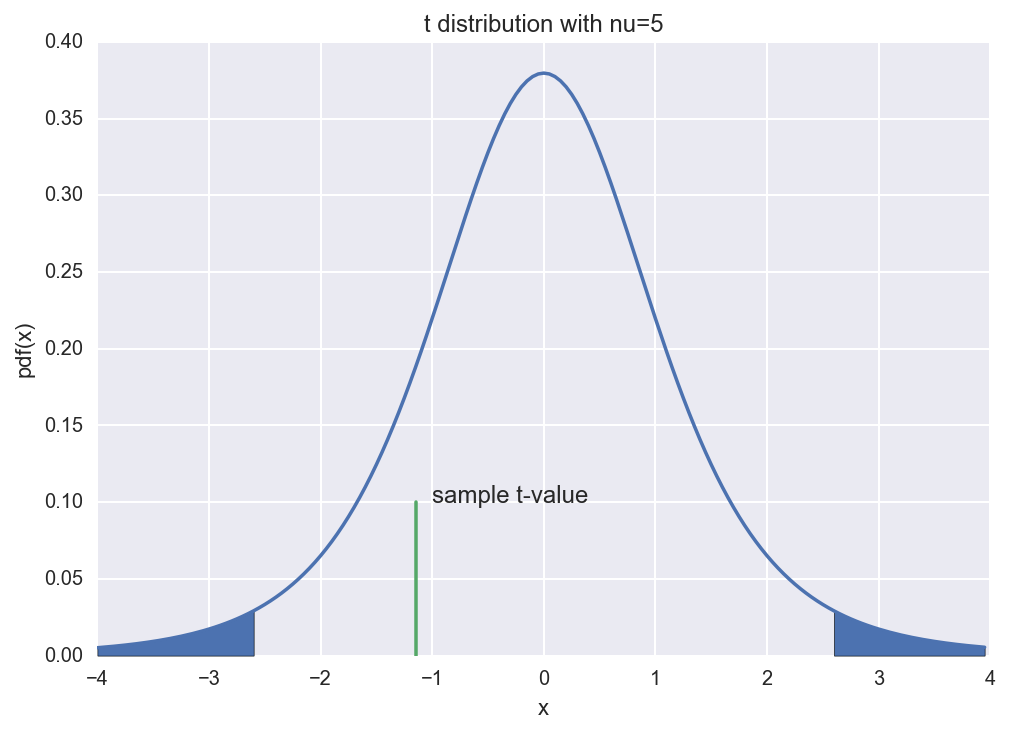

In [4]:
# Graphical representation of the calculated t value
alpha = 0.05
nu = len(sample) - 1
z = np.arange(-4,4,.05)
y = stats.t.pdf(z, nu)
tc = abs(stats.t.ppf(alpha/2, nu))

zminus = [zi for zi in z if zi < -tc]
zplus = [zi for zi in z if zi > tc]

fig, ax = plt.subplots()
ax.plot(z, y)
ax.plot([tvalue, tvalue], [0, 0.1])
ax.fill_between(zminus, 0, stats.t.pdf(zminus, nu))
ax.fill_between(zplus, 0, stats.t.pdf(zplus, nu))
plt.text(-1, 0.1, "sample t-value")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.title("t distribution with nu=%d" % nu)

print("t_critical at alpha=%f: %.4f" % (alpha, tc))

## precision-recall

Possible results of hypothesis testing

|                   |       Truth Positive     |      Truth Negative     |
|-------------------|:------------------------:|:-----------------------:|
| **Test Positive** |     True Positive        | False Positive (Type I) |
| **Test Negative** | False Negative (Type II) |     True Negative       |

precision = tp/(tp+fp), recall = tp/(tp+fn)

Decrease $\alpha$: less false negatives, more false positives => lower precision, higher recall

Increase $\alpha$: more false negatives, less false positives => higher precision, lower recall

We demonstrate this effect below.

In [11]:
np.random.seed(92837)
mu0 = 4.67
sigma = 0.05
sample_size = 6
n_samples = 100

rvs = stats.norm.rvs(loc=mu0, scale=sigma, size=(sample_size, n_samples))

# null hypothesis samples 
tvalues1, pvalues1 = stats.ttest_1samp(rvs, mu0)
# alternate hypothesis samples
tvalues2, pvalues2 = stats.ttest_1samp(rvs, mu0+2*sigma)

for alpha in [0.05, 0.01]:
    fn = sum([1 for p in pvalues1 if p < alpha])
    tp = n_samples - fn
    tn = sum([1 for p in pvalues2 if p < alpha])
    fp = n_samples - tn
    
    print("alpha = %.2f" % alpha)
    print("       | true P | true N")
    print("test P | %6d | %6d" % (tp, fp))
    print("test N | %6d | %6d" % (fn, tn))
    print("precision: %.3f recall: %.3f" % (float(tp)/(tp+fp), float(tp)/(tp+fn)))
    print("")


alpha = 0.05
       | true P | true N
test P |     94 |      2
test N |      6 |     98
precision: 0.979 recall: 0.940

alpha = 0.01
       | true P | true N
test P |     98 |     21
test N |      2 |     79
precision: 0.824 recall: 0.980



# Bayesian posterior inference

## Bayes' Theorem

$$p(\theta | \text{Data}) = \frac{p(\text{Data} | \theta) p(\theta)}{p(\text{Data})}$$

$\theta$ : parameters that needs to be evaluated based on data

$p(\theta | \text{Data})$: posterior probability, probability of $\theta$ given the data

$p(\theta)$: prior probability, estimate of the parameters from background information

$p(\text{Data} | \theta)$: likelihood, probability of observing data given parameters $\theta$

$p(\text{Data})$: marginal likelihood, probability of getting the data over all possible parameters. Can be thought of as normalization constant which is an integral of the numerator ($p(data | \theta) p(\theta)$) over all parameter values.

## Biased coin example 

For a specific example, let us look at the example of coin flips. Suppose that we do not know if a coin is biased and would like to calculate the probability that the coin will turn up heads after a coin flip. In this case, the parameter is the probability that the coin flip will be heads. We also assume that the prior is a uniform probability distribution using the principle of maximum entropy. The following script illustrates how distribution of the probability of head will change after each coin flip.

mean heads: 0.5200


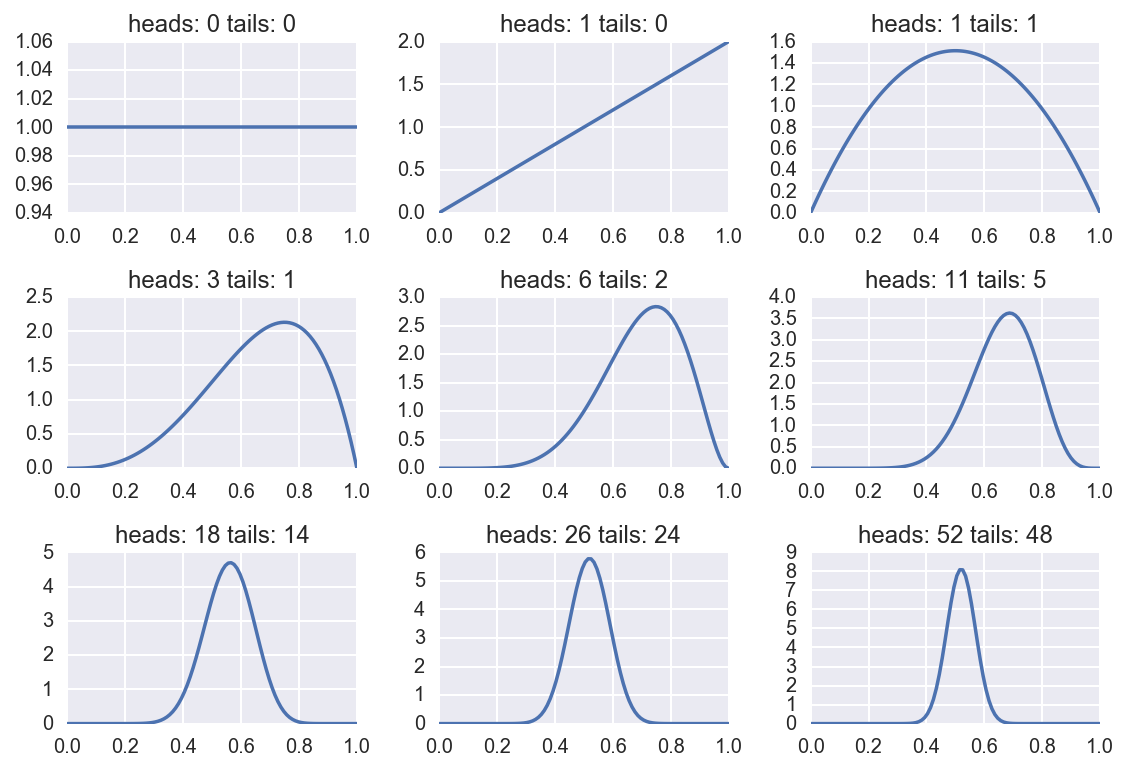

In [6]:
np.random.seed(4962)

# number of coin flips
nflips = 100

# delta: spacing of theta
delta = 0.01
# theta: probability of coin toss resulting in head
theta = np.linspace(0, 1, 1/delta)
# pdf of theta, assume uniform for the initial case
prior = np.ones(len(theta))

priors = [prior]
heads = np.random.choice([0, 1], nflips)
for i in heads:
    if i == 1:
        # in case of heads
        likelihood = theta
    else:
        # in case of tails
        likelihood = 1 - theta

    # update
    posterior = likelihood*prior
    # normalize
    prior = posterior/sum(posterior)/delta
    priors.append(prior)

#plt.plot(theta, p_th)
for i, idx in enumerate([0, 1, 2, 4, 8, 16, 32, nflips/2, nflips]):
    plt.subplot(3, 3, i + 1)
    plt.plot(theta, priors[idx])
    plt.title("heads: %d tails: %d" % (sum(heads[:idx]), idx - sum(heads[:idx])))

#plt.subplots_adjust(hspace=0.4)
plt.tight_layout()

print("mean heads: %.4f" % (sum(heads)/100.0))

## conjugate priors

If we can find a family of functions for the prior such that the likelihood\*prior results in a posterior that are in the same family of functions, the prior is called a **conjugate prior** for the likelihood function. In this case, the posterior has a closed form expression and numerical evaluation is not necessary.


In the example of the coin flip above, if we get $x$ heads out of $n$ coin flips, the likelihood function is a binomial distribution with the probabilty

$ p(x | \theta) = {n \choose x} \theta^x (1 - \theta)^{n-x} $

If we can choose a prior of the form

$ f(\theta; \alpha, \beta) \propto \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} $

the resulting posterior function will also belong to this family of functions which is called a beta distribution. The graphical representation of this relationship is:

$$ \overbrace{\text{Binomial}}^{\text{likelihood}} \cdot \overbrace{\text{Beta}}^{\text{prior}} = \overbrace{\text{Beta}}^{\text{posterior} }$$

The initial prior in our examples as a uniform distribution which corresponds to $\alpha=1$, $\beta=1$. After $x$ heads in $n$ coin flips, the posterior then becomes:

$ f(\theta; x+1, n-x+1) \propto \theta^x (1 - \theta)^{n-x}$

The plots below show that our numerical evaluation of the posterior overlap with the closed form analytical form of the posterior using conjugate priors. A table of conjugate distributions can be found [here.](https://en.wikipedia.org/wiki/Conjugate_prior)

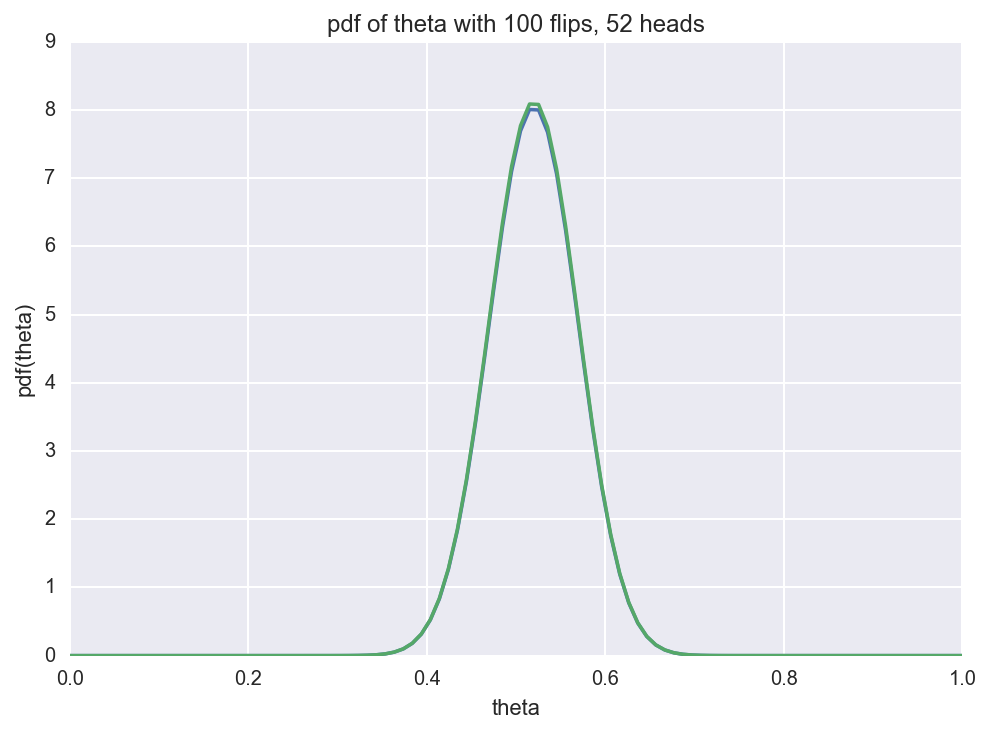

In [7]:
n_heads = sum(heads)
n_flips = len(heads)

plt.plot(theta, stats.beta.pdf(theta, n_heads + 1, n_flips - n_heads + 1))
plt.plot(theta, priors[100])
plt.xlabel("theta")
plt.ylabel("pdf(theta)")
plt.title("pdf of theta with %d flips, %d heads" % (n_flips, n_heads))

## Posterior Sampling

### Markov Chain Monte Carlo (MCMC)

Consider the case of a probability density landscape in parameter space. We want to move a point around in this parameter space so that the frequency of its appearance at each point is proportional to its probability density. A density distribution plot of the resulting list of paramter values can be used to approximate the posterior. How can this be achieved?

If $p(\theta \rightarrow \theta + \Delta \theta)$ is the probability of jumping from $\theta$ to $\theta + \Delta \theta$ in parameter space, under a stationary condition, the number of points jumping from $\theta$ to $\theta + \Delta \theta$ will have to be equal to that jumping from $\theta + \Delta \theta$ to $\theta_1$. This can be expressed as:

$$ p(\theta) p(\theta \rightarrow \theta + \Delta \theta) = p(\theta + \Delta \theta) p(\theta + \Delta \theta \rightarrow \theta)$$

which can be rearranged to give:
$$ \frac{p(\theta \rightarrow \theta + \Delta \theta)}{p(\theta + \Delta \theta \rightarrow \theta)} = \frac{p(\theta + \Delta \theta)}{p(\theta)} $$

This transition ratio can be realized by the following algorithm:

1. Consider a jump from $\theta$ to $\theta + \Delta \theta$. Calculate $p(\theta + \Delta \theta)/p(\theta)$
2. If $p(\theta + \Delta \theta)/p(\theta) \geq 1$ jump to $\theta + \Delta \theta$. 
3. If $p(\theta + \Delta \theta)/p(\theta) < 1$, jump to $\theta + \Delta \theta$ with the probability $p(\theta + \Delta \theta)/p(\theta)$, otherwise stay at the current point

This algorithm is convienient for calculating the posterior probability density because the ratio between two parameter values can be calculated if the likelihood and prior function is known by the Bayes' Rule:

$$\frac{p(\theta + \Delta \theta | \text{Data})}{p(\theta | \text{Data})} = \frac{p(\text{Data} | \theta + \Delta \theta) p(\theta + \Delta \theta)}{p(\text{Data} | \theta) p(\theta)}$$

The random walk of parameter values using this algorithm will efficiently sample parameter values in regions with high probability density.

### Sampling using coin weight data

We will use posterior sampling to get the distributions of mean and std values of the quarter weight sample data used in the previous t-test. For simplicity, we assume a uniform distribution for the prior $\mu$ and $\sigma$. Possible range of $\mu$ was set at (4, 7) and the range of $\sigma$ was (0.00, 1). The likelihood in this case is:

$$ p(X | \mu, \sigma) = \prod_{i = 1}^{n} \frac{1}{\sigma\sqrt{2\pi}}\, e^{-\frac{(x_i - \mu)^2}{2 \sigma^2}}$$

The initial parameter has a high influence in the beginning portions of the random walk of the parameters, so we discarded the initial 500 steps in the burn-in period for plotting the results. From the posterior sampling, we get the probablity distribution of $\mu$ and $\sigma$ values.

This calculation can be simpilified using [pyMC](https://pymc-devs.github.io/pymc3/). This [link](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/) has examples relevant the Bayesian posterior sampling.

In [8]:
mu_lower = 4
mu_upper = 7
mu_delta = 0.05/2

sigma_lower = 0.001
sigma_upper = 1
sigma_delta = 0.02/2

mu_init = 5.67
sigma_init = 0.1

sample = [5.680, 5.690, 5.659, 5.630, 5.596, 5.667]
#sample = stats.norm.rvs(5.7, 0.07, 100)
def prior(mu, sigma):
    if mu < mu_lower or mu > mu_upper:
        return 0
    elif sigma < sigma_lower or sigma > sigma_upper:
        return 0
    else:
        return 1.0

def likelihood(data, mu, sigma):
    return stats.norm.pdf(data, mu, sigma).prod()

def posterior(data, mu, sigma):
    return likelihood(data, mu, sigma)*prior(mu, sigma)

niter = 10000

trace = np.zeros([niter, 2])

mu_current = mu_init
sigma_current = sigma_init

for i in range(niter):
    mu_new = mu_current + stats.norm.rvs(0, mu_delta)
    sigma_new = sigma_current + stats.norm.rvs(0, sigma_delta)
    ratio = posterior(sample, mu_new, sigma_new)/posterior(sample, mu_current, sigma_current)
    
    if np.random.uniform() < ratio:
        mu_current = mu_new
        sigma_current = sigma_new
        
    trace[i, :] = [mu_current, sigma_current]

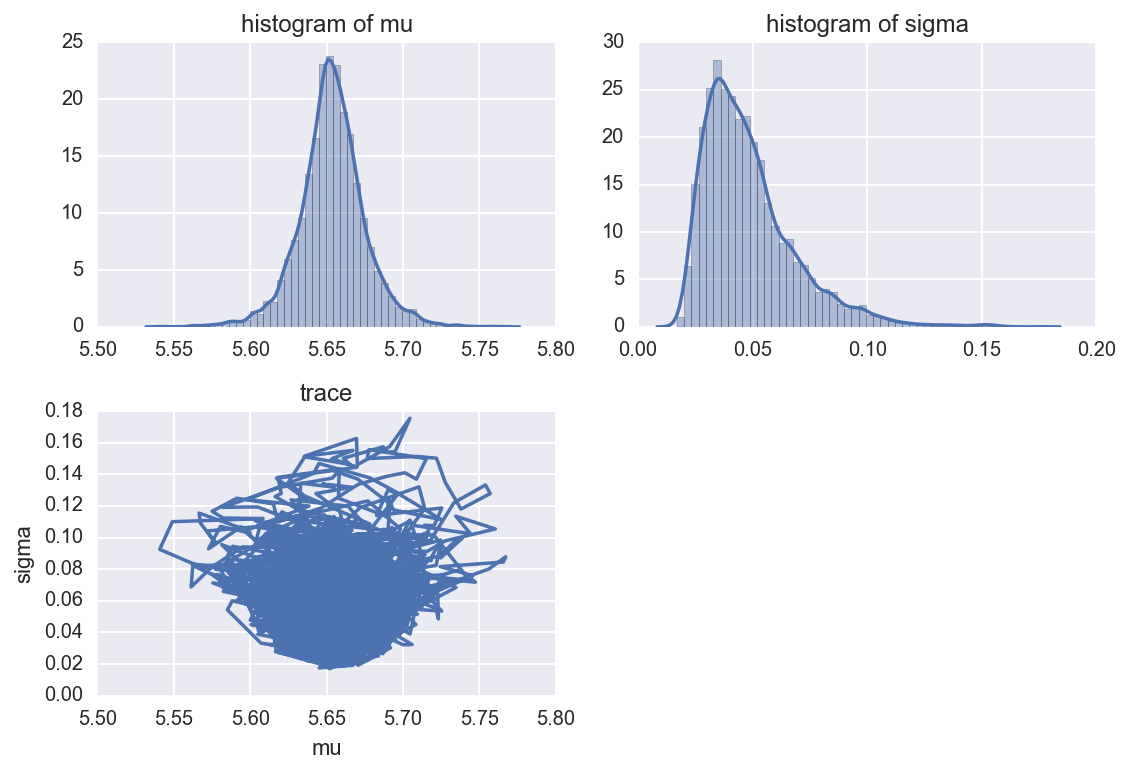

In [9]:
plt.subplot(2, 2, 1)
sns.distplot(trace[500:,0])
plt.title('histogram of mu')
plt.subplot(2, 2, 2)
sns.distplot(trace[500:,1])
plt.title('histogram of sigma')
plt.subplot(2, 2, 3)
plt.plot(trace[500:,0], trace[500:,1])
plt.title('trace')
plt.xlabel('mu')
plt.ylabel('sigma')
plt.tight_layout()

## Comparison between Hypothesis Testing and Bayesian Inference

### Hypothesis testing
- accepts or rejects the null hypothesis with point parameter value
- uses p-values which is $p(D | H_0)$, the probability of observing the data given null hypothesis $H_0$ is true.
- if the null hypothesis is not accepted, parameter is unlikely to be the null hypothesis parameter value. The probabilities for possible parameter values are unknown. 


### Bayesian Inference
- results in probability distribution of parameter values which can be updated with each measurement. The probability distribution of the parameter values is given by posterior.
- needs background information for initial prior